In [45]:
import pandas as pd

In [46]:
results_p = pd.read_pickle("results_p")
results_p

,着順,枠,馬番,馬名,斤量,騎手,人気,性,齢,体重,体重変化,date,race_type,course_ren,weather,ground_state
202101010101,1,5.0,9,ディーバサンライズ,52.0,△秋山稔,7.0,牝,3,474,-22,2021-06-12,芝,1200,小雨,良
202101010101,2,3.0,6,バンベルク,56.0,横山和,2.0,牡,3,470,-2,2021-06-12,芝,1200,小雨,良
202101010101,3,7.0,14,リツィタル,54.0,大野,14.0,牝,3,394,2,2021-06-12,芝,1200,小雨,良
202101010101,4,5.0,10,クレマチステソーロ,54.0,鮫島駿,5.0,牝,3,468,2,2021-06-12,芝,1200,小雨,良
202101010101,5,3.0,5,ペイシャケイティー,54.0,古川吉,4.0,牝,3,456,8,2021-06-12,芝,1200,小雨,良
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202110040302,12,3.0,5,メイショウヤマツミ,56.0,小牧,6.0,牡,3,500,-18,2021-08-21,ダ,1700,曇,良
202110040302,13,3.0,6,サンデーインアスク,54.0,川田,4.0,牝,3,414,0,2021-08-21,ダ,1700,曇,良
202110040302,14,5.0,9,ベントラ,56.0,酒井,12.0,牡,3,500,6,2021-08-21,ダ,1700,曇,良
202110040302,15,7.0,13,ギレルモ,56.0,岩田望,10.0,牡,3,490,0,2021-08-21,ダ,1700,曇,良


In [47]:
results_p["rank"] = results_p["着順"].map(lambda x: 1 if x < 4 else 0)

results_p["rank"].value_counts()

0    1897
1     519
Name: rank, dtype: int64

In [48]:
def split_data(df, test_size):
  # ソート
  sorted_id_list = df.sort_values('date').index.unique()
  # データの分割
  train_id_list = sorted_id_list[:round(len(sorted_id_list) * (1-test_size))]
  test_id_list = sorted_id_list[round(len(sorted_id_list) * (1-test_size)):]
  
  train = df.loc[train_id_list]
  test = df.loc[test_id_list]
  return train, test

In [49]:
results_p.drop(["馬名"],axis=1,inplace=True)
results_d = pd.get_dummies(results_p)
train,test = split_data(results_d,0.3)

In [50]:
X_train = train.drop(["rank","date"],axis=1)
y_train = train["rank"]
X_test = test.drop(["rank","date"],axis=1)
y_test = test["rank"]

ランダムフォレスト

In [51]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=100)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=100)

In [52]:
y_pred = rf.predict_proba(X_test)[:,1]
y_pred

array([0.71, 0.87, 0.85, 0.06, 0.09, 0.03, 0.16, 0.04, 0.04, 0.1 , 0.01,
       0.87, 0.92, 0.84, 0.05, 0.01, 0.13, 0.03, 0.06, 0.06, 0.11, 0.03,
       0.86, 0.77, 0.87, 0.04, 0.  , 0.17, 0.04, 0.02, 0.07, 0.02, 0.05,
       0.06, 0.89, 0.8 , 0.77, 0.03, 0.06, 0.06, 0.05, 0.05, 0.06, 0.06,
       0.73, 0.71, 0.8 , 0.03, 0.03, 0.03, 0.22, 0.01, 0.12, 0.07, 0.08,
       0.01, 0.01, 0.04, 0.03, 0.03, 0.76, 0.78, 0.8 , 0.21, 0.26, 0.06,
       0.07, 0.08, 0.05, 0.03, 0.12, 0.2 , 0.  , 0.02, 0.01, 0.88, 0.86,
       0.84, 0.18, 0.04, 0.01, 0.04, 0.06, 0.06, 0.  , 0.9 , 0.85, 0.81,
       0.07, 0.  , 0.02, 0.05, 0.  , 0.01, 0.3 , 0.  , 0.11, 0.02, 0.08,
       0.03, 0.9 , 0.88, 0.77, 0.16, 0.2 , 0.09, 0.  , 0.03, 0.88, 0.85,
       0.77, 0.05, 0.02, 0.13, 0.1 , 0.03, 0.01, 0.  , 0.  , 0.  , 0.02,
       0.09, 0.01, 0.01, 0.02, 0.91, 0.86, 0.87, 0.03, 0.24, 0.19, 0.09,
       0.01, 0.02, 0.02, 0.06, 0.02, 0.03, 0.07, 0.01, 0.83, 0.75, 0.85,
       0.12, 0.12, 0.19, 0.05, 0.03, 0.06, 0.07, 0.

In [53]:
y_test

202103010301    1
202103010301    1
202103010301    1
202103010301    0
202103010301    0
               ..
202103020301    0
202103020301    0
202103020301    0
202103020301    0
202103020301    0
Name: rank, Length: 659, dtype: int64

In [54]:
len(y_pred)

659

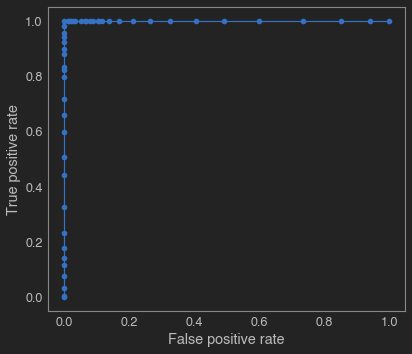

In [59]:
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
from jupyterthemes import jtplot

# https://github.com/dunovank/jupyter-themes
jtplot.style(theme="monokai")

fpr,tpr,thresholds = roc_curve(y_test,y_pred)
plt.plot(fpr,tpr,marker="o")
plt.xlabel("False positive rate")
plt.ylabel('True positive rate')
plt.grid()
plt.show()

In [56]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00994036,
       0.0139165 , 0.01988072, 0.027833  , 0.03379722, 0.04970179,
       0.06361829, 0.06759443, 0.07952286, 0.08946322, 0.10337972,
       0.10735586, 0.11729622, 0.13717694, 0.16898608, 0.21073559,
       0.26441352, 0.32405567, 0.4055666 , 0.49304175, 0.59840954,
       0.73558648, 0.8528827 , 0.94234592, 1.        ])

In [57]:
tpr

array([0.        , 0.00641026, 0.03205128, 0.07692308, 0.11538462,
       0.14102564, 0.17948718, 0.23076923, 0.32692308, 0.44230769,
       0.50641026, 0.59615385, 0.66025641, 0.71794872, 0.79487179,
       0.82051282, 0.83333333, 0.87820513, 0.8974359 , 0.92307692,
       0.94230769, 0.95512821, 0.98076923, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        ])

In [58]:
thresholds

array([1.95, 0.95, 0.93, 0.92, 0.91, 0.9 , 0.89, 0.88, 0.87, 0.86, 0.85,
       0.83, 0.82, 0.81, 0.8 , 0.79, 0.78, 0.77, 0.76, 0.75, 0.74, 0.72,
       0.71, 0.66, 0.26, 0.25, 0.24, 0.22, 0.21, 0.2 , 0.19, 0.18, 0.17,
       0.16, 0.15, 0.14, 0.13, 0.12, 0.1 , 0.09, 0.08, 0.07, 0.06, 0.05,
       0.04, 0.03, 0.02, 0.01, 0.  ])

In [60]:
roc_auc_score(y_test,y_pred)

1.0